# Learning with semi-definite programming: statistical bounds based on fixed point analysis and excess risk curvature
*Dan Allouche and Nicolas Dahan*

# 1. Presentation of the paper
## 1.1 Semi-definte programming : definition


The paper focuses on a class of convex optimization that generalizes linear programming: semi-definite programming.

The problem of this class of optimization can be written as follows: 
$$
    \max_{Z\succeq 0}(\langle A,Z \rangle : \langle B_j,Z\rangle = b_j \text{ for }j \in \{1,\cdots,m\})
$$

Where $A, B_1, \cdots, B_m$ are given matrices. $Z\succeq 0$ means that $Z$ is positive semidefinite. 
$\langle A,B \rangle = Tr(AB^T)=\sum A_{ij}B_{ij}$.

Note that contrary to the article we are only interested here in the real case.

## 1.2 Statistical properties of the SDP Estimators
In order to study the statistical properties of the SDP estimators, in particular by using the whole theory of statistical learning, the article proposes to see the problem in the following way:

Let $A \in \mathbb{R}^{n\times n}$ a random matrix and $\mathcal{C} \subset \mathbb{R}^{n\times n}$ the subset of constraints.
the oracle predictor is:
$$
Z^*\in \underset{Z \in \mathcal{C}}{argmax} \langle\mathbb{E}(A),Z\rangle.
$$

The aim is to estimate $Z^*$, since we have only one observation, we estimate $Z^*$ by:
$$
\hat{Z}\in \underset{Z \in \mathcal{C}}{argmax} \langle A,Z\rangle.
$$
Therefor $\hat{Z}$ is the empirical risk minimizator (ERM) built on a single observation, where the loss function is given by : $Z \in \mathcal{C} \rightarrow l_{Z}(A)=- \langle A,Z\rangle$. 

As seen in the statistical learning course, we will quantify the quality of the MRE by studying the behavior of the stochastic error (i.e $l_{\hat{Z}}(A) - l_{Z^*}(A)$). In particular, we can use the Vapnik-Chervonenkis dimension theory, but this analysis is global (in the sense that we try to control the $\sup_{Z \in \mathcal{C}}|\langle A- \mathbb{E}(A),Z - Z^*\rangle|)$ and so pessimistic. For this purpose the article develops a notion that was unknown to us until now: the fixed point complexity parameter.

**Definition:** Let $0<\Delta < 1 $ the fixed point complexity parameter at deviation $1 - \Delta$ is :

$$
r^*(\Delta)=\inf (r> 0: \mathbb{P}[\sup_{Z\in \mathcal{C}:\langle\mathbb{E}(A),Z^* - Z\rangle \leq r}\langle A - \mathbb{E}(A),Z - Z^*\rangle \leq \frac{r}{2}] \geq 1 - \Delta ) 
$$





*Proof:*

Assume that $\mathcal{C}$ is star-shaped in $Z^*$ and let $0< \Delta < 1$. In this proof we are going to denote $r^*(\Delta)$ by $r^*$. \\
Let $\psi : r > 0\rightarrow \frac{1}{r} \underset{Z \in \mathcal{C}:\langle\mathbb{E} (A), Z^{*}-Z\rangle \leq r}{\sup}\langle A-\mathbb{E} A, Z-Z^{*}\rangle$. \\
In a first step we are going to prove that $\psi$ is a non-increasing function: \\


> Let $r'\geq r > 0$ and let $Z\in \mathcal{C}$ such that: $\langle \mathbb{E}(A),Z^* - Z\rangle\leq r'$. \\
Since $\mathcal{C}$ is star-sharped in $Z^*$, we have $Z'=Z^* + \frac{r}{r'}(Z-Z^*)\in \mathcal{C}$ . \\
Moreover, $\langle \mathbb{E}(A),Z^* - Z'\rangle = \frac{r}{r'} \langle \mathbb{E}(A),Z^* - Z\rangle \leq r$, thus $Z' \in \{Z \in \mathcal{C} | \langle \mathbb{E}(A),Z^* - Z\rangle\leq r \}$. \\
By the definition of the supremum we obtain: $\underset{Z \in \mathcal{C}:\langle\mathbb{E} (A), Z^{*}-Z\rangle \leq r}{\sup}\langle A-\mathbb{E} A, Z-Z^{*}\rangle \geq \langle A-\mathbb{E} A, Z'-Z^{*}\rangle = \frac{r}{r'}\langle A-\mathbb{E} A, Z-Z^{*}\rangle$. \\
We just show that: \\
 $$
 \forall Z \in \{Z \in \mathcal{C} | \langle \mathbb{E}(A),Z^* - Z\rangle\leq r' \} : \underset{Z \in \mathcal{C}:\langle\mathbb{E} (A), Z^{*}-Z\rangle \leq r}{\sup}\langle A-\mathbb{E} A, Z-Z^{*}\rangle \geq \frac{r}{r'}\langle A-\mathbb{E} A, Z-Z^{*}\rangle
 \\
 \implies \forall Z \in \{Z \in \mathcal{C} | \langle \mathbb{E}(A),Z^* - Z\rangle\leq r' \} : \psi(r) \geq \frac{1}{r'}\langle A-\mathbb{E} A, Z-Z^{*}\rangle \\
 \implies \psi(r) \geq \psi(r').
 $$
We can now conclude that $\psi$ is a non-increasing function.


Since $\psi$ is a non-increasing function and $r^*=\inf (r> 0: \mathbb{P}[\psi(r) \leq \frac{1}{2}] \geq 1 - \Delta )$, we can say that there exist a decreasing sequence $\left(r_{n}\right)_{n}$ of positive real numbers tending to $r^{*}$ such that for all $n \geq 0, \mathbb{P} [\Omega_{n}] \geq 1-\Delta$ where $\Omega_{n}$ is the event $\Omega_{n}=\{\psi(r_{n}) \leq \frac{1}{2}\}$. \\
Moreover, for all $n$ we have $\psi(r_{n+1}) \geq \psi(r_n) \implies \Omega_{n+1} \subset \Omega_n$. \\
It follow that  $\mathbb{P}\left[\cap_{n} \Omega_{n}\right]=\lim_{n} \mathbb{P}\left[\Omega_{n}\right] \geqslant 1-\Delta$. \\
We are going to show that $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle \leqslant r^{*}$ on the event $\cap_{n} \Omega_{n}$, to do that we are goint to prove that for all $n \geq 0$ we have $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle \leqslant r_n$ on the event $ \Omega_n$ in a first step.

>  Let $n\geq0$ and let's assume by absurdity that: $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle > r_n$. \\
Let's define $Z^{\prime}$ such that $Z^{\prime}-Z^{*}=$ $\frac{r_n} {\langle\mathbb{E} (A), Z^{*}-\hat{Z}\rangle}\left(\hat{Z}-Z^{*}\right) .$ \\
Then we have $\left\langle\mathbb{E} (A), Z^{*}-Z^{\prime}\right\rangle=r_n$
and $Z^{\prime} = Z^* + \frac{r_n} {\langle\mathbb{E} (A), Z^{*}-\hat{Z}\rangle}\left(\hat{Z}-Z^{*}\right)  \in \mathcal{C}$ because $\mathcal{C}$ is
star-shaped in $Z^{*}$. \\
Therefore, on the event $\Omega_n$ we have :
$$
\begin{align}
  \langle A-\mathbb{E} (A), Z^{\prime}-Z^{*}\rangle &\leq \frac{r_n}{2} \\
  &=\frac{\langle\mathbb{E} (A), Z^{*}-Z^{\prime}\rangle}{2} \\
  \implies \langle A, Z^{\prime}-Z^*\rangle  &\leq - \frac{\langle\mathbb{E} (A), Z^{*}-Z^{\prime}\rangle}{2} \\
  \implies \langle A, \hat{Z}-Z^{*}\rangle &\leq-\frac{\langle\mathbb{E} (A), Z^{*}-\hat{Z}\rangle}{2}<-\frac{r_n}{2}
\end{align}
$$
which implies that $\left\langle A, \hat{Z}-Z^{*}\right\rangle < 0$ and therefore $\hat{Z}$ does not maximize $Z \rightarrow\langle A, Z\rangle$ over
$\mathcal{C}$ : absurd by the definition of $\hat{Z}$.

We just show that $\forall n \geq 0$ on the event $\Omega_n$ we have $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle \leqslant r_n$. Therefore, on the event $\cap_{n} \Omega_{n}$ we have $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle \leqslant r_n \ \forall n \geq 0$, and thus, passing to the limit when $n \rightarrow + \infty$ we obtain that  $\left\langle\mathbb{E} (A), Z^{*}-\hat{Z}\right\rangle \leqslant r^*$ on $\cap_{n} \Omega_{n}$ which holds with probability at least $1 - \Delta$.



# 2. SDP relaxation of some problem 
## 2.1 Application to signed clustering

In this section we are going to focus on the signed clustering problem. \\
We have a signed graph, where each edge carries either a non negative scalar weight that encodes a measure of affinity between pairs of nodes or negative scalar weight that encodes a measure of distrust or dissimilarity. For exemple, it can represent friendship-enmity in the case of users relationship in Facebook. \\

We consider a signed stochastique block model (SSBM) where we are given a graph $G$ with $n$ nodes (typically users) which are divides in $K$ groups or communities : $\{\mathcal{C}_1, \cdots ,\mathcal{C}_{K}\}$, such that without any noise edges within each community are positif (for simplicity $+1$) and edges between groups are negative ($-1$). \\
The problem is that we only have access to a $n\times n$ sparse adjacency symmetric martix $A$ such that: 


*   $A_{ii}=1 \ \forall i\in \{1,\cdots,n\}$
*   $\forall 1 \leq i < j \leq n$, $A_{ij}=s_{ij}(2B_{ij}-1)$

where : $s_{ij}\sim Bern(\delta)$, $B_{ij} \sim Bern(p)$ if $i \sim j$ (nodes $i$ and $j$ belong to the same community)  and $B_{ij} \sim Bern(q)$ in the other case for some $0\leq q< \frac{1}{2} < p \leq 1$ and $\delta \in (0,1)$. Obviously all variables are independent. \\

The aim is to recover the community membership matrix $\overline{Z}=(\overline{Z}_{ij})_{i,j}$ with $\overline{Z}_{ij}=1$ if $i \sim j$ and $\overline{Z}_{ij}=0$ otherwise. Let's implement all this on python: 



In [ ]:
import numpy as np
import scipy.sparse as ss
import numpy.random as rnd
import math

def SSBM(n, k, p, q, delta):
    """A signed stochastic block model graph generator.
    Args:
        n: (int) Number of nodes.
        k: (int) Number of communities.
        p, q, delta: (probabilities) Noise value
    Returns:
        (a,b),c where a is a sparse n by n matrix of positive edges, b is a sparse n by n matrix of negative edges c is an array of cluster membership.
    """



    assign = np.zeros(n, dtype=int) # It will be the array of cluster membership 
    size = [0] * k  # It will be the size of each group


    perm = rnd.permutation(n) # Perm contains the rearranged nodes
    size = [math.floor((i + 1) * n / k) - math.floor((i) * n / k) for i in range(k)]
    tot = size[0] # it will indicate the number of places left in the cluster
    cluster = 0
    i = 0
    while i < n:
        if tot == 0: # If there is no place left
            cluster += 1 # we pass to the next cluster
            tot += size[cluster]
        else:
            tot -= 1
            assign[perm[i]] = cluster
            i += 1

    pdat = []
    prow = []
    pcol = []
    ndat = []
    nrow = []
    ncol = []


    for j in range(1, n):
      for i in range(j): # for 1 <= i < j <= n
        if rnd.binomial(1, delta)==1: 
          if assign[i]==assign[j]:
            if rnd.binomial(1, p) == 0:
              ndat.append(1)
              ndat.append(1)
              ncol.append(j)
              ncol.append(i)
              nrow.append(i)
              nrow.append(j)
            else:
              pdat.append(1)
              pdat.append(1)
              pcol.append(j)
              pcol.append(i)
              prow.append(i)
              prow.append(j)
          else:
            if rnd.binomial(1, q)==0:
              ndat.append(1)
              ndat.append(1)
              ncol.append(j)
              ncol.append(i)
              nrow.append(i)
              nrow.append(j)
            else:
              pdat.append(1)
              pdat.append(1)
              pcol.append(j)
              pcol.append(i)
              prow.append(i)
              prow.append(j)
    return (ss.coo_matrix((pdat, (prow, pcol)), shape=(n, n)).tocsc(),
            ss.coo_matrix((ndat, (nrow, ncol)), shape=(n, n)).tocsc()), assign


n = 1000
K = 5
delta = 0.5
p = 0.6
q = 0.4

(A_p, A_n), true_assign = SSBM(n=n, k=K, p=p, q=q, delta=delta)

Now we are going to solve the signed clustering problem using the class *Cluster* of the library  **SigNet** (https://github.com/alan-turing-institute/signet).




In [ ]:
! pip install git+https://github.com/alan-turing-institute/SigNet.git

  Cloning https://github.com/alan-turing-institute/SigNet.git to /tmp/pip-req-build-zo294hg1
  Running command git clone -q https://github.com/alan-turing-institute/SigNet.git /tmp/pip-req-build-zo294hg1
  Created wheel for SigNet: filename=SigNet-0.1.0-cp37-none-any.whl size=13213 sha256=9781c19eaa4d04d9dc65894710743296f0ace8e56384fb2563e757b069afc442
  Stored in directory: /tmp/pip-ephem-wheel-cache-q8kula4l/wheels/22/02/53/a046be9e8a21d4ccd4dda6adcd879e88cd40e894b30f40ae51
Successfully built SigNet


In [ ]:
from signet.cluster import Cluster

c = Cluster((A_p, A_n))
A_assign = c.spectral_cluster_adjacency(k = K)

*spectral_cluster_adjacency* solve the signed clustering problem by using the eigenvectors of the adjacency matrix.
To evaluate the quality of the clustering we are going to use the *adjusted rand score* from scikit-learn.

In [ ]:
from sklearn.metrics import adjusted_rand_score

print(adjusted_rand_score(A_assign, true_assign))

0.9504553487858517


The objective is now to show that this problem can be seen as a SDP.
Let $\alpha:= \delta(p+q-1)$ and $J=(1)_{n\times n}$. we are going to show that:
$$
\overline{Z}=Z^* \in \underset{Z \in \mathcal{C}}{argmax}\langle\mathbb{E}(A)-\alpha J,Z\rangle
$$
where $\mathcal{C}=\{Z \in \mathbb{R}^{n \times n}|Z \succeq 0, Z_{ij} \in [0,1], Z_{ii}=1\}$


> Let $Z \in \mathcal{C}$ we have:
$$
\begin{align}
  \langle\mathbb{E}(A)-\alpha J,Z\rangle &= \sum_{i,j=1}^nZ_{ij}(\mathbb{E}(A_{ij})-\alpha) = \sum_{i \sim j}Z_{ij}(\mathbb{E}(A_{ij})-\alpha) + \sum_{i \nsim j}Z_{ij}(\mathbb{E}(A_{ij}-\alpha)\\ &= (1 - \alpha) \sum_{i}Z_{ii} + \sum_{i \sim j; i \neq j}Z_{ij}(\delta(p-q)) + \sum_{ i \nsim j} Z_{ij}(\delta(q-p)) \\ &= \delta(p-q)[\sum_{i \sim j; i \neq j}Z_{ij} - \sum_{i \nsim j}Z_{ij}] + (1 -\alpha) \sum_i Z_{ij}
\end{align}
$$
This quantity is maximal when $Z =\overline{Z}$. Moreover $\overline{Z} \in \mathcal{C}$.

Since we don't know $\mathbb{E}(A)$ and $\alpha$, we have to estimate them. As seen previously we will estimate $\mathbb{E}(A)$ by $A$ and we will simply assume that $\alpha$ is known. Therfore we will estimate: 
$$ \hat{Z} \in \underset{Z\in \mathcal{C}}{argmax} \langle A -\alpha J,Z \rangle
$$  
which is a SDP estimator, we can now use the Theorem with the fixed point complexity parameter to obtain statistical bounds for the estimation of $Z^*$ by $\hat{Z}$.

The paper shows that with strong assumptions we can have $\hat{Z}=Z^*$ with high probability. One of these assumption is that we have $K \geq \frac{n}{\log n}$, whithout this assumption we have with the same probability: 
$$ \|Z^* -\hat{Z}\|_1 \leq \frac{n}{c_1 \delta(p-q)K}$$
where $c_1$ is a constant.


The class *Cluster* allow us to use SDP relaxation to solve the signed clustering problem with the method : *SDP_cluster*.

The solver use the method of Burer Monteiro using projected gradient updates.

In [ ]:
SDP_assign = c.SDP_cluster(k = K)
print(adjusted_rand_score(SDP_assign, true_assign))

0.8130225098328645


We see that the SDP solver has a performance that is close to the solver from the litterature of signed clustering. But the main advantage of the SDP relaxation is the fact that SDP is a more general problem, thus a lot of new way to solve it can appear in the next years. 

## 2.2 Application to MAX-CUT problem

> Bloc en retrait



Consider an undirected graph $G=(V,E^{0})$ and its adjacency matrix $A^{0}\in \{0,1\}^{n\times n}$.

-$V:=\{1,...,n\}$ is the set of vertices  
-$E^{0}$ is the set of edges

We assume that $\forall i \in V$, $A^{0}_{ii}=0$.

We define a **cut** of $G$ as any subset $S\subset V$ and the weight of the **cut** as the number of edges in $E$ between $S$ and its complement $\bar{S}=V\setminus S$.

The mathematical definition of the weight is the following one:

> $\textrm{cut}(G,S):= \frac{1}{2} \sum_{i,j \in S\times \bar{S}} A^{0}_{ij}$

The **Max-Cut** problem is to find the cut with maximal weight:



> $S^{*} \in \underset{S \subset V}{\textrm{argmax}}~\textrm{cut}(G,S)$

Goemans and Williamson have designed a famous 0.878-approximation algorithm  for this NP-hard problem based on SDP relaxation.

The idea is to introduce, for a $S \subset V$, $x\in \{-1,1\}^{n}$ such as:



> $\forall i \in V$,  $x_{i} = \left\{
    \begin{array}{ll}
        1 & \mbox{if } i \in S \\
        -1 & \mbox{if } i \notin S
    \end{array}
\right.$

So now, $\textrm{cut}(G,S)=\frac{1}{4} \sum_{i,j=1}^{n} A^{0}_{ij}(1-x_{i}x_{j})$. 

Then, by recalling $\textrm{cut}(G,S)=:\textrm{cut}(G,x)$, solving the **Max-cut** problem is equivalent to :



> $x^{*} \in \underset{x\in \{-1,1\}^{n}}{\textrm{argmax}}~\textrm{cut}(G,x)$

denote $(x_{i}x_{j})_{i,j}=x x^{T}=Z$, then the problem become



> $\underset{Z \in \mathbb{R}^{n \times n}\\ rank(Z)=1\\ Z \succeq 0 \\ Z_{ii}=1}{\textrm{max}}\big (\frac{1}{4}\sum_{i,j=1}^{n}A^{0}_{ij}(1-Z_{ij})\big )$

This problem admits a **SDP relaxation** by removing the rank 1 constraint.

Then we obtain the SDP relaxation problem of MAX-CUT from Goemans and Williamson (1995):



> $Z^{*} \in \underset{Z \in \mathbb{R}^{n \times n}\\ Z \succeq 0 \\ Z_{ii}=1}{\textrm{argmin}}~\langle A^{0},Z\rangle$ 

To compare with the previous formulation, we just removed an additional term which doesn't change the value of $Z^{*}$.

Finally we can re-writte this problem using the Laplacian $L$ of the graph $G$.

$L=D-A^{0}$, where $D$ is the degree matrix (diagonal matrix) where $D_{ii}$ equal of the total number of connections for the node $i$.


$\langle A^{0},Z\rangle=\langle D-L,Z\rangle=\langle D,Z\rangle-\langle L,Z\rangle$,

but $D$ is a diagonal matrix and $Z_{ii}=1$, $\forall i \in {1,...,n}$, so the value $\langle D,Z\rangle$ can not be consider for the optimization problem.

Re-writting the problem:




> $Z^{*} \in \underset{Z \in \mathbb{R}^{n \times n}\\ Z \succeq 0 \\ Z_{ii}=1}{\textrm{argmin}}~\langle A^{0},Z\rangle = \underset{Z \in \mathbb{R}^{n \times n}\\ Z \succeq 0 \\ Z_{ii}=1}{\textrm{argmin}}~\langle -L,Z\rangle=\underset{Z \in \mathbb{R}^{n \times n}\\ Z \succeq 0 \\ Z_{ii}=1}{\textrm{argmax}}~\langle L,Z\rangle$

















Here we present an example of how to perform the optimization problem.

We use the Goemans-Williamson approximation algorithm for MAXCUT.
They showed that if we project the solution of the optimization problem (with SDP relaxation) onto a random hyperplan, we obtain a cut whose expected capacity is at least 0.878 times the optimum.



In [ ]:
pip install picos

In [ ]:
pip install networkx

In [ ]:
import picos as pc
import networkx as nx
import pylab
import random
import cvxopt as cvx
import cvxopt.lapack
import numpy as np
import matplotlib.pyplot as plt 
import sys

In [ ]:
#vecteur des positions des objets du graphe
pos={
  0:  (0.07, 0.70), 1:  (0.18, 0.78), 2:  (0.26, 0.45), 3:  (0.27, 0.66),
  4:  (0.42, 0.79), 5:  (0.56, 0.95), 6:  (0.60, 0.80), 7:  (0.64, 0.65),
  8:  (0.55, 0.37), 9:  (0.65, 0.30), 10: (0.77, 0.46), 11: (0.83, 0.66),
  12: (0.90, 0.41), 13: (0.70, 0.10), 14: (0.56, 0.16), 15: (0.40, 0.17),
  16: (0.28, 0.05), 17: (0.03, 0.38), 18: (0.01, 0.66), 19: (0.00, 0.95)
}

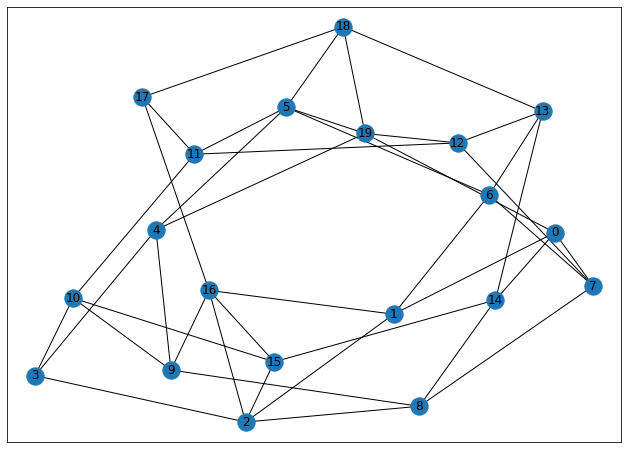

In [ ]:
#On fénit un graph en utilisant la notation LCF
N=20
G=nx.LCF_graph(N,[7,5,14],7)
grafo_labels = nx.get_edge_attributes(G,'weight')


#Graphe non orienté de poids tous égaux à 1
c={}
for e in sorted(G.edges(data=True)):
  weight = 1
  e[2]['weight'] = weight
  c[(e[0], e[1])]  = weight

def new_figure():
  try:
    global fig
    pylab.close(fig)
  except NameError:
    pass
  fig=pylab.figure(figsize=(11,8))
  fig.gca().axes.get_xaxis().set_ticks([])
  fig.gca().axes.get_yaxis().set_ticks([])

new_figure()
nx.draw_networkx(G,pos=nx.spring_layout(G))
nx.draw_networkx_edge_labels(G,pos,edge_labels = grafo_labels)
pylab.show()

In [ ]:
G=nx.Graph(G)

#On instancie le problème d'optimisation "maxcut" via l'API Picos
maxcut = pc.Problem()

# On ajoute notre matrice symétrique de detection de noeuds pour un cut
X=maxcut.add_variable('X', (N,N), 'symmetric')

#on explicite la matrice d'adjacence
AA=nx.adjacency_matrix(G, nodelist=None, weight='weight').todense()
np.fill_diagonal(AA, 0)


# On explicite le Laplacian du graph (on prend 0,25 de cette matrice).
LL = 1/4.*nx.laplacian_matrix(G).todense()
L=pc.new_param('L', LL)

# on ajoute les contraintes sur Z:
#diag(Z)=[1,...,1]
#Z est sdp

maxcut.add_constraint(pc.diag_vect(Z) == 1)
maxcut.add_constraint(Z >> 0)

# ce que l'on souhaite optimiser
maxcut.set_objective('max', L|Z)

print(maxcut)

#L'optimiseur pour le probleme
maxcut.solve(solver='cvxopt')

print('valeur du cut: {0}'.format(maxcut.obj_value()))

Semidefinite Program
  maximize ⟨L, Z⟩
  over
    20×20 symmetric variable Z
  subject to
    maindiag(Z) = [1]
    Z ≽ 0
valeur du cut: 35.65974711344694


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: new_param is deprecated: Use picos.Constant instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: diag_vect is deprecated: Use picos.maindiag instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: Problem.obj_value is deprecated: Use value instead.


In [ ]:
#On met un seed pour reproduire les mêmes résultats (pour ce qui est aléatoire).
cvx.setseed(1)

# On réalise la factorisation de Cholesky
V=Z.value
cvxopt.lapack.potrf(V)
for i in range(N):
  for j in range(i+1,N):
    V[i,j]=0

#On fait jusqu'à 100 projections et on s'arrète dès que l'on est à un fatcuer 0,878 de l'optimum trouvé précédemment.
count=0
obj_sdp=maxcut.obj_value()
obj=0
while (count < 100 or obj < 0.878*obj_sdp):
  r=cvx.normal(20,1)
  x=cvx.matrix(np.sign(V*r))
  o=((x.T*L*x)).value
  if o > obj:
    x_cut=x
    obj=o
  count+=1
x=x_cut

#On distingue maintenant sous espaces de noeuds par rapport au cut 
S1=[n for n in range(N) if x[n]<0]
S2=[n for n in range(N) if x[n]>0]
cut = [(i,j) for (i,j) in G.edges() if x[i]*x[j]<0]
leave = [e for e in G.edges if e not in cut]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Problem.obj_value is deprecated: Use value instead.
  del sys.path[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Problem.obj_value is deprecated: Use value instead.


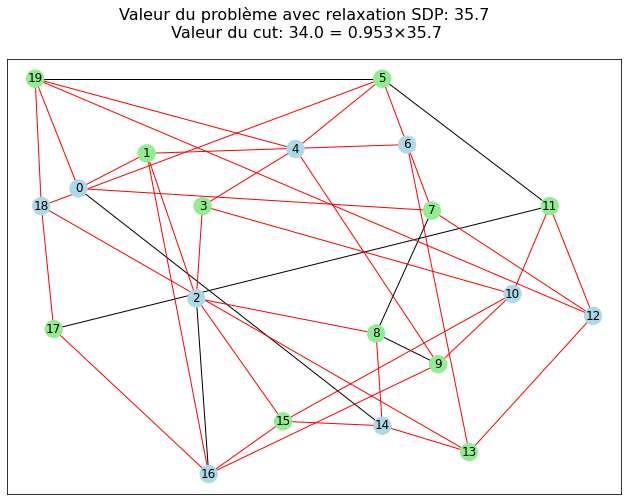

In [ ]:
#On trace le graphe avec un code couleur pour faire apparaitre les sous ensembles de noeuds

new_figure()


node_colors=[('lightgreen' if n in S1 else 'lightblue') for n in range(N)]


nx.draw_networkx(G, pos, node_color=node_colors, edgelist=leave)
labels={e: '{}'.format(G[e[0]][e[1]]['weight']) for e in leave}
nx.draw_networkx_edge_labels(G, pos, edge_labels=grafo_labels)

nx.draw_networkx_edges(G, pos, edgelist=cut, edge_color='r')
labels={e: '{}'.format(G[e[0]][e[1]]['weight']) for e in cut}
nx.draw_networkx_edge_labels(G, pos, edge_labels=grafo_labels, font_color='r')




#valeur du problème SDP
rval = maxcut.obj_value()

#valeur du poid total pour les arrêtes touchées par le cut
sval = sum(G[e[0]][e[1]]['weight'] for e in cut)
fig.suptitle(
  'Valeur du problème avec relaxation SDP: {0:.1f}\n Valeur du cut: {1:.1f} = {2:.3f}×{0:.1f}'
  .format(rval, sval, sval/rval), fontsize=16, y=0.97)


pylab.show()